                                                MACHINE LEARNING LAB ASSESEMENT -2

**Name: Haswanth Raj A**

**Reg No: 21MIS1053**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_squared_error, mean_absolute_error, r2_score)
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Load the excel file
df = pd.read_excel('concrete_fault_detection_data.xlsx')

In [ ]:
df.head()

,Cement Content (kg/m³),Water Content (kg/m³),Aggregate Content (kg/m³),Superplasticizer Content (kg/m³),Curing Time (days),Temperature (°C),Humidity (%),Compressive Strength (MPa),Vibration Frequency (Hz),Surface Area (m²),"Fault (1=Yes, 0=No)"
0,249.816048,234.540599,953.779868,27.407340,39.604073,22.488459,71.655253,56.350118,68.552802,432.453550,0
1,480.285723,259.336279,620.670453,15.760814,5.721922,31.136137,52.193480,38.868662,46.757096,14.118635,0
2,392.797577,150.093580,1110.676194,21.747308,15.297459,24.693337,57.752729,57.337500,5.570690,455.587514,0
3,339.463394,224.974820,929.181367,13.081449,46.647081,7.915590,77.337983,14.410497,91.851015,153.566852,0
4,162.407456,214.349197,610.042718,18.901037,32.192465,11.495308,90.104482,21.495638,98.032913,254.603128,0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop them as necessary
df.fillna(df.mean(), inplace=True)  # Example: fill with mean for numeric columns


Cement Content (kg/m³)              0
Water Content (kg/m³)               0
Aggregate Content (kg/m³)           0
Superplasticizer Content (kg/m³)    0
Curing Time (days)                  0
Temperature (°C)                    0
Humidity (%)                        0
Compressive Strength (MPa)          0
Vibration Frequency (Hz)            0
Surface Area (m²)                   0
Fault (1=Yes, 0=No)                 0
dtype: int64


In [ ]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df= scaler.fit_transform(df)

In [ ]:
X = df[['Cement Content (kg/m³)', 'Water Content (kg/m³)', 'Aggregate Content (kg/m³)', 'Superplasticizer Content (kg/m³)','Curing Time (days)','Temperature (°C)','Humidity (%)','Compressive Strength (MPa)','Vibration Frequency (Hz)','Surface Area (m²)']]
y_class = df['Fault (1=Yes, 0=No)']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)


In [ ]:
# Create and fit the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_class_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Create and fit the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_class_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_class_pred_dt = dt_classifier.predict(X_test)
y_class_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics
metrics = {}

for model_name, y_pred in zip(['Decision Tree', 'Random Forest'], [y_class_pred_dt, y_class_pred_rf]):
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_class_test, y_pred),
        'Precision': precision_score(y_class_test, y_pred),
        'Recall': recall_score(y_class_test, y_pred),
        'F1-Score': f1_score(y_class_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_class_test, y_pred)
    }

metrics


{'Decision Tree': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0,
  'Confusion Matrix': array([[834,   0],
         [  0,  66]])},
 'Random Forest': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0,
  'Confusion Matrix': array([[834,   0],
         [  0,  66]])}}

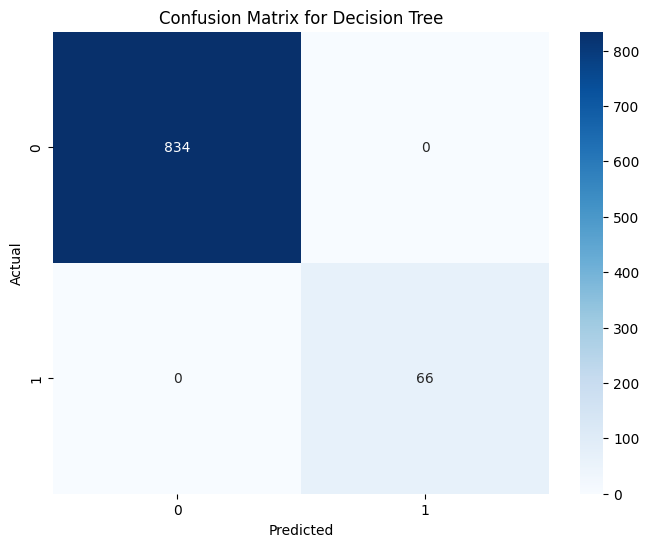

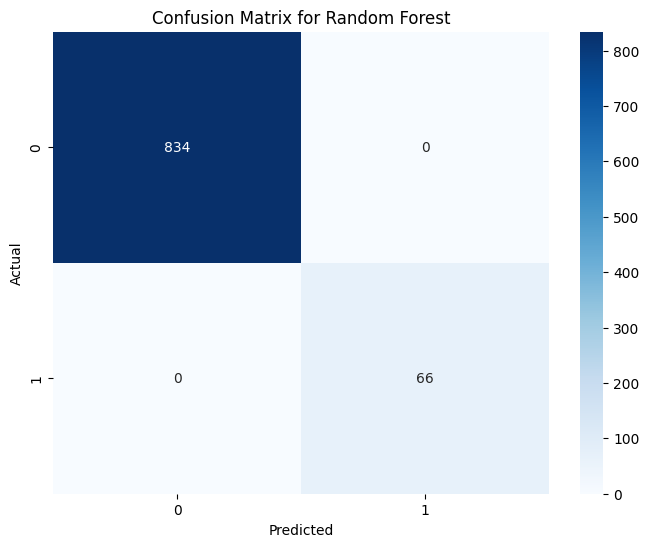

In [ ]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
for model_name in metrics.keys():
    plot_confusion_matrix(metrics[model_name]['Confusion Matrix'], model_name)

ValueError: num must be an integer with 1 <= num <= 4, not 5

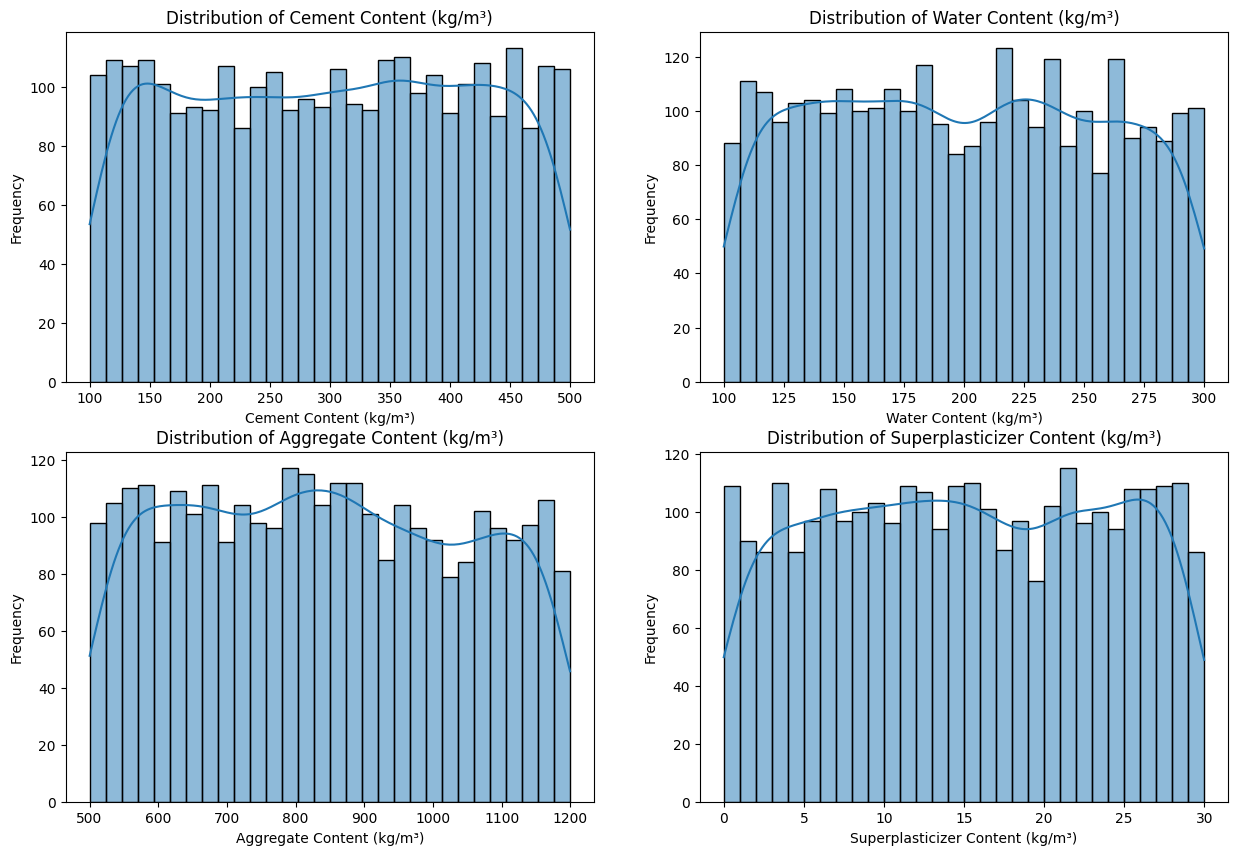

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot histograms for each numerical feature
for i, column in enumerate(['Cement Content (kg/m³)', 'Water Content (kg/m³)', 'Aggregate Content (kg/m³)', 'Superplasticizer Content (kg/m³)','Curing Time (days)','Temperature (°C)','Humidity (%)','Compressive Strength (MPa)','Vibration Frequency (Hz)','Surface Area (m²)']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Model Comparison:
              Accuracy Precision Recall F1-Score     Confusion Matrix
Decision Tree      1.0       1.0    1.0      1.0  [[834, 0], [0, 66]]
Random Forest      1.0       1.0    1.0      1.0  [[834, 0], [0, 66]]


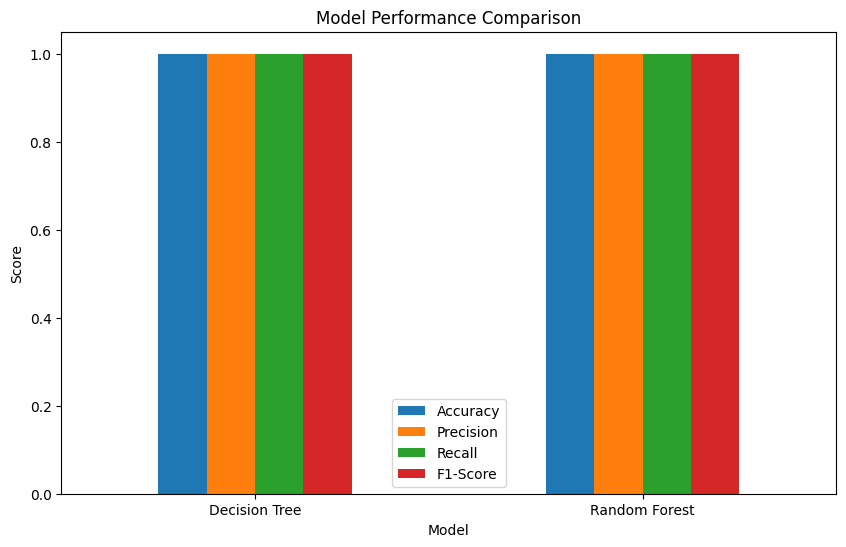

In [ ]:
# Create a DataFrame to compare the model performance
model_comparison = pd.DataFrame(metrics).transpose()

# Display the comparison table
print("Model Comparison:")
print(model_comparison)

# You can also visualize the comparison using a bar chart
model_comparison[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

**Model Comparison and Conclusion**

I have used the Decision tree and random forest classifier to analyze this data
and the results are:

**Decision Tree:**

Accuracy: 1.0,

Precision: 1.0,

Recall: 1.0,

F1-Score: 1.0,


**Forest Tree:**

Accuracy: 1.0,

Precision: 1.0,

Recall: 1.0,

F1-Score: 1.0,

both of them have shown similiar values , so that the conclusion is that both of them are good for the classicication